In [7]:
import numpy as np
from model import PModel
from matplotlib import pyplot as plt

In [12]:
#Global parameters
n_loci = 9
n_gens = 100
t = (0, 10)
p1 = 0.3
p2 = 0.3
sigma1 = 0.3
sigma2 = 0.3
beta = 0.001

In [9]:
def pareto_front(sim, n_steps=100):
	cost = np.zeros(n_steps)
	res = np.linspace(0, np.max(1-sim.B), n_steps)

	for i, val in enumerate(res):
		cost[i] = np.max((sim.F)[1-sim.B >= val])
		
	return (res, cost)

def sim_array(n_loci, n_sims, n_steps=100, epi=0):
	sim = PModel(n_loci, np.zeros(n_loci), np.zeros(n_loci))
	cost_grid = np.zeros((n_sims, n_steps))

	for i in range(n_sims):
		cost = np.random.exponential(0.1, n_loci)
		res = np.random.exponential(0.1, n_loci)
		sim.update_loci(res, cost)

		if epi == 1:
			sim.add_epistasis(2, p1, sigma1)
		elif epi ==	2:
			sim.add_epistasis(2, p1, sigma1)
			sim.add_epistasis(3, p2, sigma2)

		sim.normalize()

		res, cost = pareto_front(sim)
		cost_grid[i,:] = cost

	cost_avg = np.average(cost_grid, axis=0)
	cost_std = np.std(cost_grid, axis=0)

	return cost_avg, cost_std

In [10]:
n_loci = 9
costs, err = sim_array(n_loci, 100)
costs_epi1, err_epi1 = sim_array(n_loci, 100, epi=1)
costs_epi2, err_epi2 = sim_array(n_loci, 100, epi=2)

res_pts = np.linspace(0, 1, 100)

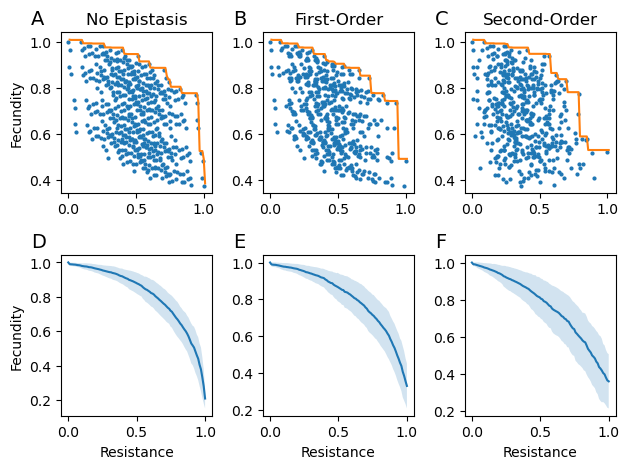

In [11]:
fig, ax = plt.subplots(ncols=3, nrows=2)

ax[0,0].set_title('No Epistasis')
ax[0,1].set_title('First-Order')
ax[0,2].set_title('Second-Order')

sim = PModel(n_loci, np.zeros(n_loci), np.zeros(n_loci))

cost = np.random.exponential(0.1, n_loci)
res = np.random.exponential(0.1, n_loci)
sim.update_loci(res, cost)
sim.normalize()
front_res, front_costs = pareto_front(sim)

ax[0,0].scatter(1 - sim.B, sim.F, s=4)
ax[0,0].plot(front_res+0.01, front_costs+0.01, color='tab:orange')
ax[0,0].set_ylabel('Fecundity')

sim.update_loci(res, cost)
sim.add_epistasis(2, p1, sigma1)
sim.normalize()
front_res, front_costs = pareto_front(sim)

ax[0,1].scatter(1 - sim.B, sim.F, s=4)
ax[0,1].plot(front_res+0.01, front_costs+0.01, color='tab:orange')

sim.update_loci(res, cost)
sim.add_epistasis(2, p1, sigma1)
sim.add_epistasis(3, p2, sigma2)
sim.normalize()
front_res, front_costs = pareto_front(sim)

ax[0,2].scatter(1 - sim.B, sim.F, s=4)
ax[0,2].plot(front_res+0.01, front_costs+0.01, color='tab:orange')

ax[1,0].plot(res_pts, costs)
ax[1,0].fill_between(res_pts, costs-err, costs+err, alpha=0.2)
ax[1,0].set_xlabel('Resistance')
ax[1,0].set_ylabel('Fecundity')

ax[1,1].plot(res_pts, costs_epi1)
ax[1,1].fill_between(res_pts, costs_epi1-err_epi1, costs_epi1+err_epi1, alpha=0.2)
ax[1,1].set_xlabel('Resistance')

ax[1,2].plot(res_pts, costs_epi2)
ax[1,2].fill_between(res_pts, costs_epi2-err_epi2, costs_epi2+err_epi2, alpha=0.2)
ax[1,2].set_xlabel('Resistance')

ax[0,0].annotate("A", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[0,1].annotate("B", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[0,2].annotate("C", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,0].annotate("D", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,1].annotate("E", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)
ax[1,2].annotate("F", xy=(-0.2, 1.05), xycoords="axes fraction", fontsize=14)

plt.tight_layout()